# 부천시 버스정보안내기 설치현황 데이터

In [5]:
import geopandas as gpd
gpd.read_file('data/bucheongrid/bucheonjsonjson.geojson')



,gid,val,geometry
0,다사376426,721.0,"MULTIPOLYGON (((126.79423 37.48053, 126.79422 ..."
1,다사372468,111.0,"MULTIPOLYGON (((126.78934 37.51836, 126.78934 ..."
2,다사351459,63.0,"MULTIPOLYGON (((126.76566 37.51010, 126.76565 ..."
3,다사385461,356.0,"MULTIPOLYGON (((126.80411 37.51213, 126.80410 ..."
4,다사352468,200.0,"MULTIPOLYGON (((126.76671 37.51822, 126.76670 ..."
...,...,...,...
5620,다사379488,NaN,"MULTIPOLYGON (((126.79710 37.53643, 126.79709 ..."
5621,다사387492,NaN,"MULTIPOLYGON (((126.80612 37.54009, 126.80611 ..."
5622,다사374464,NaN,"MULTIPOLYGON (((126.79164 37.51476, 126.79163 ..."
5623,다사374455,NaN,"MULTIPOLYGON (((126.79172 37.50665, 126.79171 ..."


In [1]:
import pandas as pd
import re

In [2]:
# 파일 불러오기
bus_data = pd.read_csv('data/경기도 부천시_버스정보안내기설치현황_20200130.csv', encoding='euc-kr')

# 비어있는 columns 제거
bus_data = bus_data.iloc[:, [0,1,2,3,4,5,6]]
bus_data

# index -> columns['번호'] 변경
bus_data.set_index('번호', inplace=True)
bus_data

# 비어있는 rows 제거
bus_data = bus_data.dropna(axis=0, thresh=1)
bus_data

# columns의 NaN 개수 확인
# nan_bus_data = bus_data.isnull().sum(axis=0)
# print(nan_bus_data)

# columns의 NaN 삭제


,지역,행정동,정류소ID,정류소 명칭,안내기유형,세부유형
번호,,,,,,
1.0,오정,도당동,11001.0,장미공원앞,LED,표지판일체형
2.0,원미,상동,11002.0,삼산체육관역.영상문화단지정문,LED,쉘터(거치형)
3.0,원미,상동,11005.0,벚꽃마을,LED,쉘터(거치형)
4.0,원미,상동,11006.0,벚꽃마을,LCD,쉘터(독립형)
5.0,원미,상동,11008.0,상동고,LCD,독립형
...,...,...,...,...,...,...
813.0,오정,고강동,13356.0,백산빌라,LED,독립형
814.0,소사,옥길동,12465.0,옥길브리즈힐후문,LED,쉘터(거치형)
815.0,소사,옥길동,12192.0,스타필드시티부천,LCD+LED,쉘터(거치형)


# 부천시 버스정류소 데이터 시각화

In [69]:
import folium
import pandas as pd

# 파일 불러오기
bus_stops = pd.read_csv('data/버스정류소현황.csv')

# bus_stops
bucheon_bus_stops = bus_stops['시군명'] == '부천시'
bucheon_bus_stops = bus_stops[bucheon_bus_stops]
bucheon_bus_stops

# 경기도 전체 버스정류소 현황 -> 부천시 버스정류소 현황 csv 파일 저장
bucheon_bus_stops.to_csv("./output/버스정류소현황ver1(부천시).csv", index=False)
bucheon_bus_stops.head()

df_bus = bucheon_bus_stops

# 부천시 지도 만들기
bucheon_map = folium.Map(location=[37.5034,126.7660], tiles='Stamen Terrain', 
                        zoom_start=12)

# 부천시 버스정류소 위치정보를 CircleMarker로 표시
for name, lat, lng in zip(df_bus.정류소명, df_bus.WGS84위도, df_bus.WGS84경도):
    folium.CircleMarker([lat, lng], 
                        popup=name,
                        radius=2
                       ).add_to(bucheon_map)
display(bucheon_map)

# 지도를 HTML 파일로 저장
# seoul_map.save('output/map_name.html')

1. 부천시 행정동(10개) 폴리라인 만들기
2. 부천시 행정동(10개) 버스정류소 위치 데이터 프레임 만들기


In [36]:
import pandas as pd

df = pd.read_csv('data/시군별유동인구데이터(완료).csv', encoding='euc-kr')
df.head()

,년월,출발지(야간체류지) 시군코드,도착지 시군코드,10대남성 유입인구,20대남성 유입인구,30대남성 유입인구,40대남성 유입인구,50대남성 유입인구,60대남성 유입인구,70대남성 유입인구,10대여성 유입인구,20대여성 유입인구,30대여성 유입인구,40대여성 유입인구,50대여성 유입인구,60대여성 유입인구,70대여성 유입인구,Unnamed: 17,FALSE
0,202001,11170,41590,19.15,64.28,116.56,136.39,118.72,45.84,13.68,23.83,52.79,67.96,51.08,33.53,26.28,16.03,NaN,NaN
1,202001,11170,41610,39.55,39.38,48.18,63.35,59.68,29.78,11.60,29.66,30.79,44.08,36.09,25.58,16.77,9.27,NaN,NaN
2,202001,11170,41630,30.51,21.78,29.73,38.39,37.38,21.49,7.53,21.10,12.57,21.77,24.48,25.13,17.43,11.46,NaN,NaN
3,202001,11170,41650,29.74,17.65,26.94,35.66,32.29,21.60,12.11,31.00,20.25,19.12,27.59,23.03,15.15,7.43,NaN,NaN
4,202001,11170,41670,9.37,8.90,21.12,17.89,22.00,10.84,2.60,14.36,16.70,21.71,15.95,11.51,8.15,4.50,NaN,NaN


In [37]:
import pandas as pd

df = pd.read_csv('data/경기도 부천시_인구현황_20210331.csv', encoding='euc-kr', thousands = ',', index_col='행정기관')
df['인구수 남자'] = df['인구수 남자'].astype('int')
df['인구수 여자'] = df['인구수 여자'].astype('int')
df['세대수'] = df['세대수'].astype('int')

df['인구수 합계'] = df['인구수 남자'] + df['인구수 여자'] # 인구수 남,여 합한 column 추가
df = df.iloc[1:11] # 부천 전체 데이터 제거

# df.replace('심곡동','경기도 부천시 심곡동', inplace=True)
# df.replace('부천동','경기도 부천시 부천동', inplace=True)
# df.replace('중동','경기도 부천시 중동', inplace=True)
# df.replace('신중동','경기도 부천시 신중동', inplace=True)
# df.replace('상동','경기도 부천시 상동', inplace=True)
# df.replace('대산동','경기도 부천시 대산동', inplace=True)
# df.replace('소사본동','경기도 부천시 소사본동', inplace=True)
# df.replace('범안동','경기도 부천시 범안동', inplace=True)
# df.replace('성곡동','경기도 부천시 성곡동', inplace=True)
# df.replace('오정동','경기도 부천시 오정동', inplace=True)
display(df)



# 파일 저장
# df.to_csv('output/부천시 인구현황ver1(정수형타입변경,인구수합계추가).csv')

,인구수 남자,인구수 여자,구성비 남자,구성비 여자,성비,세대수,세대당인구,인구수 합계
행정기관,,,,,,,,
심곡동,32424,31403,3.99,3.86,103.25,33187,1.92,63827
부천동,44854,44713,5.52,5.50,100.32,38553,2.32,89567
중동,20611,21034,2.53,2.59,97.99,17541,2.37,41645
신중동,63203,67603,7.77,8.31,93.49,54222,2.41,130806
상동,42317,43809,5.20,5.39,96.59,30965,2.78,86126
대산동,40334,41101,4.96,5.05,98.13,36315,2.24,81435
소사본동,28041,28739,3.45,3.53,97.57,24148,2.35,56780
범안동,46847,48779,5.76,6.00,96.04,37226,2.57,95626
성곡동,41696,41561,5.13,5.11,100.32,35966,2.31,83257


# 부천시 행정동별 인구분포 Folium 시각화

In [52]:
import folium
import json
# display(df)

# geo_path = 'data/HangJeongDong_ver20210101(bucheon).geojson'
geo_path = 'data/HangJeongDong_bucheon2.json'

try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))
# display(geo_data)
    
# 경기도 지도 만들기
g_map= folium.Map(location=[37.5034,126.7660], 
                   tiles='Stamen Terrain', zoom_start=12)

# Choropleth 클래스로 단계구분도 표시하기
fmap = folium.Choropleth(geo_data = geo_data,               # 지도 경계
                 data = df['인구수 합계'],           # 표시하려는 데이터
                 columns = [df.index, df['인구수 합계']],  # 열 지정
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.6,
#                  threshold_scale=[10000, 100000, 300000, 500000, 700000],              
                 key_on='feature.properties.adm_nm',
                 ).add_to(g_map)

fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(
    folium.features.GeoJsonTooltip(['adm_nm'],labels=False)
)

display(g_map)

# 부천시 인구분포도 + 지하철위치 시각화

In [65]:
import pandas as pd
import folium

# 부천시 행정동별 구분 파일 로드&인코딩
geo_path = 'data/HangJeongDong_bucheon2.json'

try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))
    
# 지도 만들기
s_map= folium.Map(location=[37.5034,126.7660], tiles='Stamen Terrain', zoom_start=12)

# Choropleth 클래스로 단계구분도 표시하기
fmap = folium.Choropleth(geo_data = geo_data,               # 지도 경계
                 data = df['인구수 합계'],           # 표시하려는 데이터
                 columns = [df.index, df['인구수 합계']],  # 열 지정
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.6,
#                  threshold_scale=[10000, 100000, 300000, 500000, 700000],              
                 key_on='feature.properties.adm_nm',
                 ).add_to(s_map)

fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(
    folium.features.GeoJsonTooltip(['adm_nm'],labels=False)
)

# 부천시 지하철 위도/경도 파일 불러오기
subway = pd.read_csv('output/subway_bucheon.csv', index_col = 0)

# 부천시 지하철 데이터프레임 컬럼명 재설정
subway.columns = ['역이름','위도','경도']

# 부천시 지하철 위치정보를 CircleMarker로 표시
for name, lat, lng in zip(subway.역이름, subway.위도, subway.경도):
    folium.CircleMarker([lat, lng],
                        radius=10,         # 원의 반지름
                        color='blue',         # 원의 둘레 색상
                        fill=True,
                        fill_color='blue',    # 원을 채우는 색
                        fill_opacity=0.2, # 투명도    
                        popup=name).add_to(s_map)
display(s_map)
# s_map.save('output/map_subway&Population.html')

# 부천시 인구분포도 + 버스위치 시각화

In [64]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# 부천시 행정동별 구분 파일 로드&인코딩
geo_path = 'data/HangJeongDong_bucheon2.json'

try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))
    
# 지도 만들기
s_map= folium.Map(location=[37.5034,126.7660], tiles='Stamen Terrain', zoom_start=12)

# Choropleth 클래스로 단계구분도 표시하기
fmap = folium.Choropleth(geo_data = geo_data,               # 지도 경계
                 data = df['인구수 합계'],           # 표시하려는 데이터
                 columns = [df.index, df['인구수 합계']],  # 열 지정
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.6,
#                  threshold_scale=[10000, 100000, 300000, 500000, 700000],              
                 key_on='feature.properties.adm_nm',
                 ).add_to(s_map)

fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(
    folium.features.GeoJsonTooltip(['adm_nm'],labels=False)
)

# 부천시 지하철 위도/경도 파일 불러오기
subway = pd.read_csv('output/subway_bucheon.csv', index_col = 0)

# 부천시 지하철 데이터프레임 컬럼명 재설정
subway.columns = ['역이름','위도','경도']

# 부천시 지하철 위치정보를 CircleMarker로 표시
for name, lat, lng in zip(subway.역이름, subway.위도, subway.경도):
    folium.CircleMarker([lat, lng],
                        radius=10,         # 원의 반지름
                        color='blue',         # 원의 둘레 색상
                        fill=True,
                        fill_color='blue',    # 원을 채우는 색
                        fill_opacity=0.2, # 투명도    
                        popup=name).add_to(s_map)
display(s_map)
s_map.save('output/map_subway&Population.html')

# 자전거 이용현황 시각화

In [ ]:
df_2020 = pd.read_excel('data/publicbike/2020년 공공자전거 무료대여소(바이크 스테이션)운영실적.xlsx', index_col='운영장소',sheet_name = 2, skiprows=[0,1], usecols=[0,1,2,3,4,5,6,7,8,9,10,11])
df_2020 = df_2020.fillna(0) # NaN -> 0 변경

# 총계 행과열 제거
df_2020.drop(['총계'], axis=0, inplace=True)
df_2020.drop(['총계'], axis=1, inplace=True)

display(df_2020)

from matplotlib import pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "data/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 막대그래프
df_2020.plot(kind='bar', figsize=(12, 6), width=0.7, stacked=True )

In [ ]:
df_2020_T = df_2020.T
df_2020_T
df_2020_T.plot(kind='bar', figsize=(12, 6), width=0.7, stacked=True )

In [ ]:
df_2019 = pd.read_excel('data/publicbike/2019년 공공자전거 무료대여소(바이크 스테이션)운영실적.xlsx', index_col='운영장소', sheet_name = 0, skiprows=[0,1,11,12,13,14,15,16,17,18], usecols=[0,1,2,3,4,5,6,7,8,9,10,11])
df_2019 = df_2019.fillna(0) # NaN -> 0 변경
df_2019.drop(['총계'], axis=0, inplace=True)
df_2019.drop(['총계'], axis=1, inplace=True)

display(df_2019)

# 막대그래프
# import seaborn as sns
# mycolors = sns.color_palette('coolwarm')
df_2019.plot(kind='barh', figsize=(12, 6), width=0.5, stacked=True, grid=True) # , color=mycolors

In [ ]:
df_2019_T = df_2019.T
df_2019_T
df_2019_T.plot(kind='bar', figsize=(12, 6), width=0.5, stacked=True )

In [ ]:
df_2018 = pd.read_excel('data/publicbike/2018년 공공자전거 무료대여소(바이크 스테이션)운영실적.xlsx', index_col='운영장소', sheet_name = 0, skiprows=[0,1], usecols=[0,2,3,4,5,6,7,8,9,10,11])
df_2018 = df_2018.fillna(0) # NaN -> 0 변경
df_2018 = df_2018.iloc[1:8]
display(df_2018)

# 막대그래프
df_2018.plot(kind='barh', figsize=(12, 6), width=0.5, stacked=True, grid=True) # , color=mycolors

In [ ]:
df_2018_T = df_2018.T
df_2018_T
df_2018_T.plot(kind='bar', figsize=(12, 6), width=0.5, stacked=True )

In [ ]:
df_2017 = pd.read_excel('data/publicbike/2017년 공공자전거 무료대여소(바이크 스테이션)운영실적.xlsx', index_col='운영장소', sheet_name = 2, skiprows=[0,1], usecols=[0,2,3,4,5,6,7,8,9,10,11])
df_2017 = df_2017.fillna(0) # NaN -> 0 변경
df_2017 = df_2017.iloc[1:8]
display(df_2017)

# 막대그래프
df_2017.plot(kind='barh', figsize=(12, 6), width=0.5, stacked=True, grid=True) # , color=mycolors

In [ ]:
df_2017_T = df_2017.T
df_2017_T
df_2017_T.plot(kind='bar', figsize=(12, 6), width=0.5, stacked=True )

In [ ]:
df_2016 = pd.read_excel('data/publicbike/2016년 공공자전거 무료대여소(바이크 스테이션)운영실적.xlsx', index_col='운영장소', sheet_name = 2, skiprows=[0,1], usecols=[0,2,3,4,5,6,7,8,9,10,11])
df_2016 = df_2016.fillna(0) # NaN -> 0 변경
df_2016 = df_2016.iloc[1:8]
display(df_2016)

# 막대그래프
df_2016.plot(kind='barh', figsize=(12, 6), width=0.5, stacked=True, grid=True) # , color=mycolors

In [ ]:
df_2016_T = df_2016.T
df_2016_T
df_2016_T.plot(kind='bar', figsize=(12, 6), width=0.5, stacked=True )

In [24]:
# 2016 ~ 2020 월별 이용현황 데이터프레임 csv로 저장

df_2016.to_csv('output/2016년 부천시 자전거 무료대여소 월별 이용현황.csv')
df_2017.to_csv('output/2017년 부천시 자전거 무료대여소 월별 이용현황.csv')
df_2018.to_csv('output/2018년 부천시 자전거 무료대여소 월별 이용현황.csv')
df_2019.to_csv('output/2019년 부천시 자전거 무료대여소 월별 이용현황.csv')
df_2020.to_csv('output/2020년 부천시 자전거 무료대여소 월별 이용현황.csv')

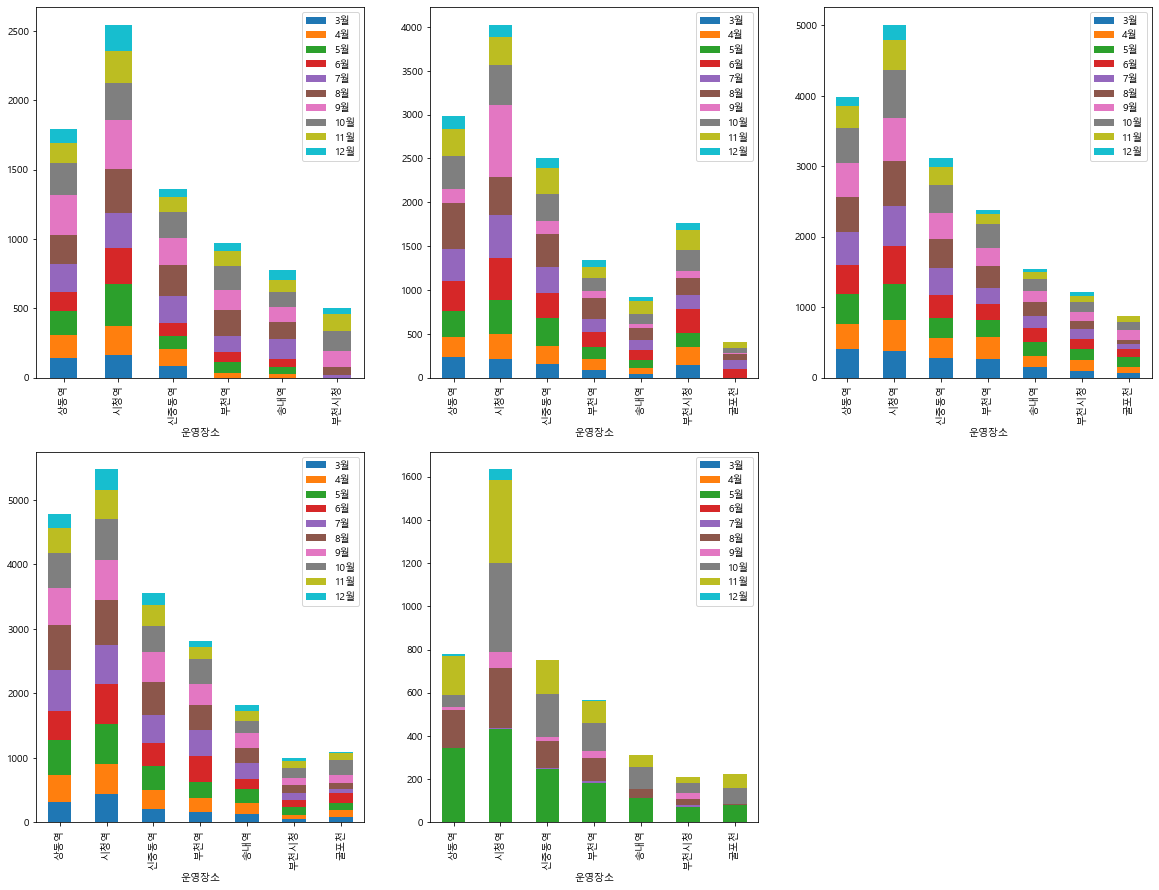

In [27]:
# 그래프 객체 생성 (figure에 5개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 15))   
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)

df_2016.plot(kind='bar', width=0.5, stacked=True, ax=ax1)
df_2017.plot(kind='bar', width=0.5, stacked=True, ax=ax2)
df_2018.plot(kind='bar', width=0.5, stacked=True, ax=ax3)
df_2019.plot(kind='bar', width=0.5, stacked=True, ax=ax4)
df_2020.plot(kind='bar', width=0.5, stacked=True, ax=ax5)

# png 저장
plt.savefig("output/부천시 자전거 무료대여소별 이용현황 그래프(2016 ~ 2020).png")

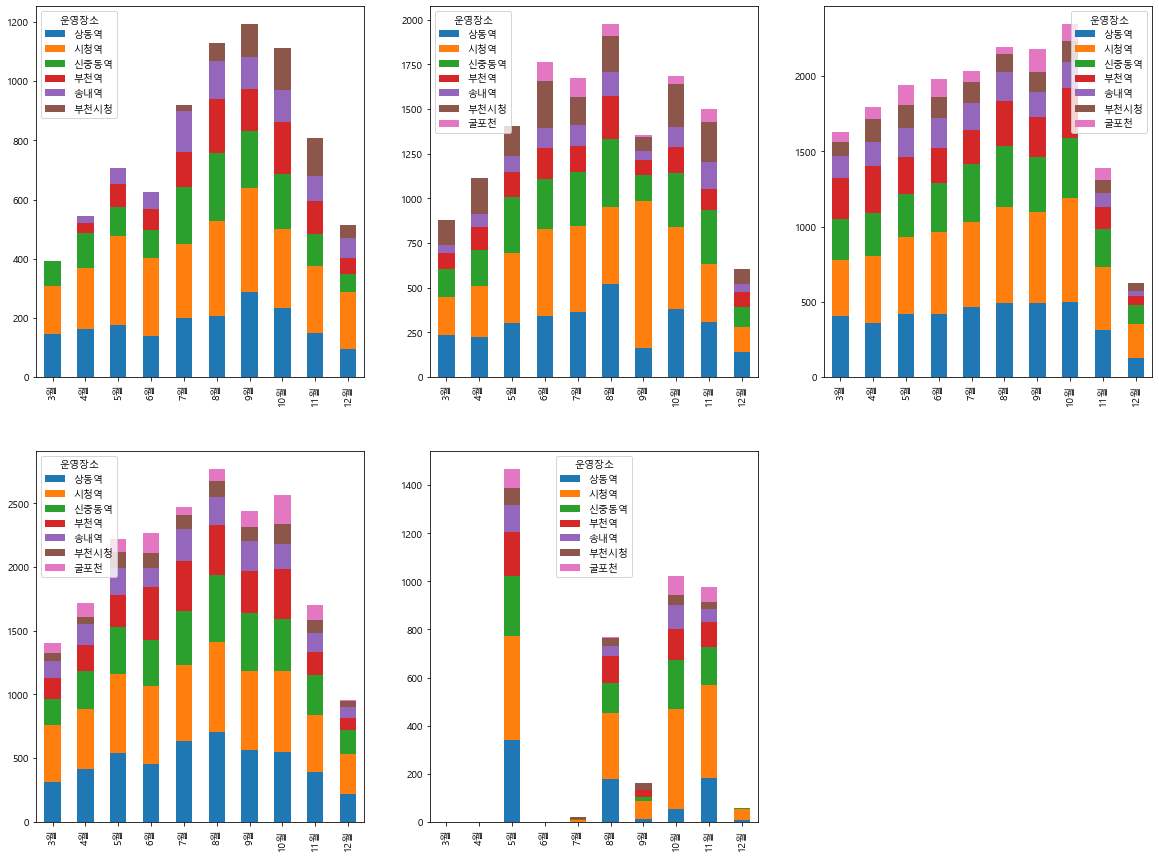

In [28]:
# 그래프 객체 생성 (figure에 5개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 15))   
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)

df_2016_T.plot(kind='bar', width=0.5, stacked=True, ax=ax1)
df_2017_T.plot(kind='bar', width=0.5, stacked=True, ax=ax2)
df_2018_T.plot(kind='bar', width=0.5, stacked=True, ax=ax3)
df_2019_T.plot(kind='bar', width=0.5, stacked=True, ax=ax4)
df_2020_T.plot(kind='bar', width=0.5, stacked=True, ax=ax5)

# png 저장
plt.savefig("output/부천시 자전거 월별 이용현황 그래프(2016 ~ 2020).png")

# 전국교통사고다발지역표준데이터
> 교통사고정보를 위치데이터 기반 제공 교통사고 항목 별 정보제공

In [ ]:
import requests, bs4
import urllib.request
from urllib.request import urlopen
from urllib.parse import urlencode, quote_plus, unquote
import json

url = 'http://apis.data.go.kr/B552061/frequentzoneLg/getRestFrequentzoneLg'
ServiceKey = 'nEOjm%2Bh6MajezPL97GQY7jDUzDS5L2qvhY4G%2BKfjjxqYULz7folcVjjKi1Q%2BgkD8P94Wowq7l24kNayBKGmsIA%3D%3D'
    
queryParams = '?' + urlencode(
    {quote_plus('ServiceKey') : ServiceKey, 
     quote_plus('searchYearCd') : '2017', 
     quote_plus('siDo') : '26',  # 경기도 : 41, 부산 : 26
     quote_plus('guGun') : '110', # 부천시 : 19, 부산시 중구 : 110
     quote_plus('type') : 'xml', 
     quote_plus('numOfRows') : '10',
     quote_plus('pageNo') : '1' })

request = urllib.request.Request(url+unquote(queryParams))
print ('Your Request:\n'+url+queryParams)
request.get_method = lambda: 'GET'
response_body = urlopen(request).read()
print ("\nResult:")
print (response_body)
print ("\nDataType of Result Data:")
print (type(response_body))

# response = requests.get(xml_url + queryParams).text.encode('utf-8')
# response = requests.get(url + queryParams).text
# response
# xml = bs4.BeautifulSoup(response, 'lxml-xml')
# xml


# 부천시 사고 다발지역
- 사고 다발지역
- 자전거 사고

In [ ]:
df_acci = pd.read_csv('data/지자체별 사고다발지역정보 데이터셋.csv')
df_acci

In [ ]:
df_bike_acci = pd.read_csv('data/자전거 사고다발지역정보 데이터셋.csv')
# df_bike_acci

bucheon_map2 = folium.Map(location=[37.5034,126.7660], tiles='Stamen Terrain', 
                        zoom_start=12)

# 부천시 버스정류소 위치정보를 CircleMarker로 표시
for name, lat, lng in zip(df_bus.정류소명, df_bus.WGS84위도, df_bus.WGS84경도):
    folium.CircleMarker([lat, lng], 
                        popup=name,
                        radius=2
                       ).add_to(bucheon_map2)

# 부천시 자전거사고 다발지역을 CircleMarker로 표시
for name, lat, lng in zip(df_bike_acci.발생건수, df_bike_acci.위도, df_bike_acci.경도):
    folium.CircleMarker([lat, lng], 
                        popup=name,
                        radius=2,
                        color='brown',
                       ).add_to(bucheon_map2)
display(bucheon_map2)

# 부천시 상가 대분류 카테고리로 쪼개기

In [21]:
import pandas as pd

# 상가 파일 불러오기
store = pd.read_csv('output/store_bucheon.csv')
store.set_index('상호명', inplace=True)

# 비어있는 columns 제거
store = store.iloc[:, range(1,7)]
 

store_food = store[store['상권업종대분류명'] == '음식']
store_stay = store[store['상권업종대분류명'] == '숙박']
store_tour = store[store['상권업종대분류명'] == '관광/여가/오락']
store_some = store[store['상권업종대분류명'] == '소매']
store_lifeservice = store[store['상권업종대분류명'] == '생활서비스']
store_education = store[store['상권업종대분류명'] == '학문/교육']
store_budongsan = store[store['상권업종대분류명'] == '부동산']
store_sport = store[store['상권업종대분류명'] == '스포츠']
# store['상권업종대분류명'].value_counts()

# 분류한 카테고리별 csv파일로 저장
# store_food.to_csv('output/store_food_bucheon.csv')
# store_stay.to_csv('output/store_stay_bucheon.csv')
# store_tour.to_csv('output/store_tour_bucheon.csv')
# store_some.to_csv('output/store_some_bucheon.csv')
# store_lifeservice.to_csv('output/store_lifeservice_bucheon.csv')
# store_education.to_csv('output/store_education_bucheon.csv')
store_budongsan.to_csv('output/store_budongsan_bucheon.csv')
# store_sport.to_csv('output/store_sport_bucheon.csv')

In [22]:
# bus = pd.read_csv('output/bucheon_bus.csv')
# bus.rename(columns={'WGS84위도':'위도',
#                          'WGS84경도':'경도'}, inplace=True)
# bus

budongsan = pd.read_csv('output/store_budongsan_bucheon.csv')
budongsan
# budongsan.rename(columns={'WGS84위도':'위도',
#                          'WGS84경도':'경도'}, inplace=True)
# bus

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,경도,위도,도로명주소
0,A+부동산,부동산,부동산중개,부동산중개,126.751949,37.506325,경기도 부천시 길주로 87
1,부동산,부동산,부동산중개,부동산중개,126.786522,37.529544,경기도 부천시 오정로 250
2,사랑방부동산,부동산,부동산중개,부동산중개,126.774675,37.477748,경기도 부천시 심곡로 70
3,뉴드림부동산,부동산,부동산중개,부동산중개,126.809567,37.471202,경기도 부천시 범안로 117
4,정요한부동산,부동산,부동산중개,부동산중개,126.755299,37.489844,경기도 부천시 송내대로74번길 22
...,...,...,...,...,...,...,...
1332,하늘채우리집공인중개사사무소,부동산,부동산중개,부동산중개,126.755786,37.502121,경기도 부천시 송내대로205번길 28
1333,다옴공인중개사사무소,부동산,부동산중개,부동산중개,126.795793,37.476451,경기도 부천시 소사로 204
1334,중동몽땅부동산,부동산,부동산중개,부동산중개,126.768841,37.496356,경기도 부천시 부흥로 237
1335,아이파크현대부동산,부동산,부동산중개,부동산중개,126.765675,37.515533,경기도 부천시 평천로 679


# geopandas를 통해 거리측정
- 소매   
- 음식   
- 생활서비스   
- 학문/교육   
- 부동산   
- 관광/여가/오락   
- 숙박   
- 스포츠   

In [24]:
import geopandas as gpd
import pandas as pd
import numpy as np
from tqdm import trange, tqdm, tqdm_notebook

In [25]:
grid = gpd.read_file('data/bucheongrid/bucheonjsonjson.geojson')

In [26]:
bike_bucheon = pd.read_csv('output/bike_bucheon.csv')
bike_bucheon = bike_bucheon.iloc[:, range(1,4)]
display(bike_bucheon)

,자전거대여소명,위도,경도
0,공공자전거대여소 부천시청역,37.504938,126.763465
1,공공자전거대여소 상동역,37.506069,126.754122
2,공공자전거대여소 신중동역,37.503068,126.775751
3,공공자전거대여소 부천역,37.484717,126.782677
4,공공자전거대여소 송내역,37.488286,126.755075
5,공공자전거대여소 부천시청,37.503728,126.766102
6,공공자전거대여소 굴포천,37.518289,126.760754


In [27]:
store_tour

,상권업종대분류명,상권업종중분류명,상권업종소분류명,경도,위도,도로명주소
상호명,,,,,,
대박당구클럽,관광/여가/오락,PC/오락/당구/볼링등,당구장,126.749725,37.490506,경기도 부천시 상일로 72
히트노래연습장,관광/여가/오락,무도/유흥/가무,노래방,126.822337,37.529844,경기도 부천시 고리울로51번길 60
물방울안마시술소,관광/여가/오락,요가/단전/마사지,스포츠마사지,126.751824,37.489402,경기도 부천시 부일로199번길 21
홍안마시술소,관광/여가/오락,요가/단전/마사지,안마시술소,126.752242,37.503715,경기도 부천시 상동로 69
모아당구장,관광/여가/오락,PC/오락/당구/볼링등,당구장,126.780812,37.505734,경기도 부천시 옥산로138번길 8
...,...,...,...,...,...,...
일백클럽,관광/여가/오락,PC/오락/당구/볼링등,당구장,126.759887,37.483207,경기도 부천시 경인로 42
즐거운세상PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,126.772760,37.487711,경기도 부천시 심중로 48
코딱지PC방,관광/여가/오락,PC/오락/당구/볼링등,인터넷PC방,126.785541,37.501458,경기도 부천시 부천로197번길 21


In [28]:
temp = gpd.read_file('data/bucheongrid/bucheonjsonjson.geojson')
temp = temp.dropna(axis=0)
축척 = sum([
    *(temp['geometry'].bounds['maxx'] - temp['geometry'].bounds['minx']),
    *(temp['geometry'].bounds['maxy'] - temp['geometry'].bounds['miny']),
    ]) / (2 * len(temp)) / 100
도보속도 = 133.1

In [29]:
minute = 5
거리 = minute * 133.1 / 100 * 60

In [30]:
def multipolygon_to_경도(x):
    경도, 위도 = x[0].exterior.xy 
    return np.array([x for x in 경도])
def multipolygon_to_위도(x):
    경도, 위도 = x[0].exterior.xy 
    return np.array([x for x in 위도])

In [31]:
def get_within_nminutes_infor(Data_input, Data_infor_input, name, value=False, geojson=False):
    """
    array을 이용하여 한번에 거리를 계산 후, 도보 3분이내 거리안에 해당하는 경우의
    수, 거리의 최소,평균,최대, 값의 최소,평균,최대를 계산합니다.
    
    geojson파일인 경우 멀티폴리곤에서 각각 경위도를 계산해주고 작업을 시행합니다.
    """
    
    Data = Data_input.copy()
    Data_infor = Data_infor_input.copy()
    
    print(name + "_작업중.............")
    
    ## geojson의 경우.. 지적도의 경우 경위도를 만들어 넣어 줄 거기 때문에 try로 함수입력
    if geojson:
        try:
            Data_infor['경도'] = Data_infor['geometry'].apply(multipolygon_to_경도) 
            Data_infor['위도'] = Data_infor['geometry'].apply(multipolygon_to_위도)        
        except:
            try:
                Data_infor['경도'] = Data_infor['geometry'].centroid.x
                Data_infor['위도'] = Data_infor['geometry'].centroid.y
            except:
                pass
            
    Len1 = len(Data)
    Len2 = len(Data_infor)
    
    tt_위도 = np.repeat(Data['위도'], Len2)
    tt_위도 = np.array(tt_위도).reshape(Len1, Len2)
    diff_위도 = tt_위도 - np.array(Data_infor['위도'])

    tt_경도 = np.repeat(Data['경도'], Len2)
    tt_경도 = np.array(tt_경도).reshape(Len1, Len2)
    diff_경도 = tt_경도 - np.array(Data_infor['경도'])
    
    diff_위도 = diff_위도**2
    diff_경도 = diff_경도**2
    dist = (diff_위도 + diff_경도)**(0.5)
    
    
    Count = []
    Dist_min = []
    Dist_mean = []
    Dist_max = []
    
    Val_min = []
    Val_mean = []
    Val_max = []
    
    
    
    for idx in tqdm(Data.index):
        if geojson:
            dist_idx = np.array([i.min() for i in dist[idx]])
        else:
            dist_idx = dist[idx]
        
        temp = Data_infor.loc[dist_idx < 거리 * 축척]           
        Count.append(len(temp))
        
        try:
            Dist_min.append(dist_idx[dist_idx < 거리 * 축척].min())
            Dist_mean.append(dist_idx[dist_idx < 거리 * 축척].mean())
            Dist_max.append(dist_idx[dist_idx < 거리 * 축척].max())
        except:
            ## 수정된 부분!
            Dist_min.append(0.0025)
            Dist_mean.append(0.0025)
            Dist_max.append(0.0025)
            
    Data[name + "_" + str(minute) + "분이내수"] = Count
    Data[name + "_" + str(minute) + "분이내거리최소"] = Dist_min
    Data[name + "_" + str(minute) + "분이내거리평균"] = Dist_mean
    Data[name + "_" + str(minute) + "분이내거리최대"] = Dist_max
        
    
    if value:
        for idx in tqdm(Data.index):
            if geojson:
                dist_idx = np.array([i.min() for i in dist[idx]])
            else:
                dist_idx = dist[idx]
                
            temp = Data_infor.loc[dist_idx < 거리 * 축척]
            Val_min.append(temp[value].min())
            Val_mean.append(temp[value].mean())
            Val_max.append(temp[value].max())
            
        Data[name + "_" + str(minute) + "분이내값최소"] = Val_min
        Data[name + "_" + str(minute) + "분이내값평균"] = Val_mean
        Data[name + "_" + str(minute) + "분이내값최대"] = Val_max
        Data = Data.fillna(0)
        
        return Data
    
    else:
        return Data

In [32]:
s = get_within_nminutes_infor(Data_input = candidate, Data_infor_input = budongsan, name="부동산")
display(s)
s.to_csv('output/var_cluster_budongsan.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 81/81 [00:00<00:00, 4267.00it/s]

부동산_작업중.............


,군집,인구밀도,위도,경도,부동산_5분이내수,부동산_5분이내거리최소,부동산_5분이내거리평균,부동산_5분이내거리최대
0,0,677.363636,37.497041,126.767486,17,0.000597,0.002685,0.003978
1,3,1207.307692,37.501440,126.750386,55,0.001182,0.002860,0.003955
2,5,553.666667,37.496461,126.787226,20,0.000844,0.002382,0.003907
3,6,599.444444,37.490873,126.790673,8,0.000904,0.002090,0.004059
4,10,564.500000,37.480927,126.798087,13,0.001549,0.002785,0.004080
...,...,...,...,...,...,...,...,...
76,7_1,475.250000,37.530072,126.808048,19,0.001967,0.003276,0.004057
77,8_0,632.250000,37.469997,126.804220,7,0.001800,0.003267,0.004050
78,8_1,677.857143,37.467883,126.800565,9,0.001095,0.001835,0.003650
79,9_0,1836.500000,37.510268,126.756608,33,0.001258,0.002752,0.003983


# Train 데이터 합치기
- 시청역을 부천시청역으로 변경


In [129]:
import pandas as pd

bike_2017 = pd.read_csv('output/2017년 부천시 자전거 무료대여소 월별 이용현황.csv', index_col='운영장소')
bike_2018 = pd.read_csv('output/2018년 부천시 자전거 무료대여소 월별 이용현황.csv', index_col='운영장소')
bike_2019 = pd.read_csv('output/2019년 부천시 자전거 무료대여소 월별 이용현황.csv', index_col='운영장소')
                        
# 열 이름 재설정
bike_2017.rename(columns={'3월':'2017-03',
                         '4월':'2017-04',
                         '5월':'2017-05',
                         '6월':'2017-06',
                         '7월':'2017-07',
                         '8월':'2017-08',
                         '9월':'2017-09',
                         '10월':'2017-10',
                         '11월':'2017-11',
                         '12월':'2017-12'}, inplace=True)

bike_2018.rename(columns={'3월':'2018-03',
                         '4월':'2018-04',
                         '5월':'2018-05',
                         '6월':'2018-06',
                         '7월':'2018-07',
                         '8월':'2018-08',
                         '9월':'2018-09',
                         '10월':'2018-10',
                         '11월':'2018-11',
                         '12월':'2018-12'}, inplace=True)

bike_2019.rename(columns={'3월':'2019-03',
                         '4월':'2019-04',
                         '5월':'2019-05',
                         '6월':'2019-06',
                         '7월':'2019-07',
                         '8월':'2019-08',
                         '9월':'2019-09',
                         '10월':'2019-10',
                         '11월':'2019-11',
                         '12월':'2019-12'}, inplace=True)


# 행과열 위치 변경
bike_2017_T = bike_2017.T
bike_2018_T = bike_2018.T
bike_2019_T = bike_2019.T

# concat
# result = pd.concat([bike_2017_T, bike_2018_T, bike_2019_T])

result2 = pd.read_csv('output/월별 자전거 이용건(2017 ~ 2019).csv', index_col = '날짜')
result2
result2.to_csv('output/bike_monthly_use(2017to2019).csv')

 # '부동산_5분이내거리최대'

In [20]:
candidate = pd.read_csv('output/cluster80.csv')
candidate = candidate.iloc[:, range(1,5)]
candidate.columns = ['군집', '인구밀도', '위도', '경도']
# display(candidate)

# budongsan = pd.read_csv('output/store_budongsan_bucheon.csv', index_col = 0)
# display(budongsan)

abc = pd.read_csv('output/var_cluster_sports.csv', index_col = 0)
display(abc)



,군집,인구밀도,위도,경도,스포츠_5분이내수,스포츠_5분이내거리최소,스포츠_5분이내거리평균,스포츠_5분이내거리최대
0,0,677.363636,37.497041,126.767486,13,0.001039,0.002737,0.004013
1,3,1207.307692,37.501440,126.750386,13,0.002433,0.002849,0.003594
2,5,553.666667,37.496461,126.787226,12,0.002020,0.003204,0.003961
3,6,599.444444,37.490873,126.790673,12,0.000951,0.002972,0.003977
4,10,564.500000,37.480927,126.798087,4,0.002314,0.003120,0.003743
...,...,...,...,...,...,...,...,...
76,7_1,475.250000,37.530072,126.808048,9,0.001617,0.002665,0.003952
77,8_0,632.250000,37.469997,126.804220,13,0.000565,0.002814,0.003768
78,8_1,677.857143,37.467883,126.800565,9,0.001214,0.002670,0.003818
79,9_0,1836.500000,37.510268,126.756608,12,0.002147,0.003434,0.004072


,Unnamed: 0,군집,인구밀도,위도,경도,부동산_5분이내수,부동산_5분이내거리최소,부동산_5분이내거리평균,부동산_5분이내거리최대
0,0,0,677.363636,37.497041,126.767486,17,0.000597,0.002685,0.003978
1,1,3,1207.307692,37.501440,126.750386,55,0.001182,0.002860,0.003955
2,2,5,553.666667,37.496461,126.787226,20,0.000844,0.002382,0.003907
3,3,6,599.444444,37.490873,126.790673,8,0.000904,0.002090,0.004059
4,4,10,564.500000,37.480927,126.798087,13,0.001549,0.002785,0.004080
...,...,...,...,...,...,...,...,...,...
76,76,7_1,475.250000,37.530072,126.808048,19,0.001967,0.003276,0.004057
77,77,8_0,632.250000,37.469997,126.804220,7,0.001800,0.003267,0.004050
78,78,8_1,677.857143,37.467883,126.800565,9,0.001095,0.001835,0.003650
79,79,9_0,1836.500000,37.510268,126.756608,33,0.001258,0.002752,0.003983
